# 第2章 感知机

配置环境：python 3.6

代码全部测试通过。

此文档方便阅读，若需要复制粘贴可以在当前目录中查看 `dual_perception.py`

下面实现**对偶感知机**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# 产生数据
def generator_data():
    data = {
        'x': [],
        'y': []
    }
    # 固定随机数
    np.random.seed(1)
    # 在 [-50, 50] * [-50, 50] 中产生 100 个点
    x1 = np.random.randint(-50, 50, 50)
    y1 = np.random.randint(-50, 50, 50)
    # # 在 [50, 150] * [50, 150] 中产生 100 个点
    x2 = np.random.randint(50, 150, 50)
    y2 = np.random.randint(50, 150, 50)
    # 拼接
    point_x1 = np.hstack((x1, x2))
    point_x2 = np.hstack((y1, y2))

    data['x1'] = point_x1.reshape(1, 100)
    data['x2'] = point_x2.reshape(1, 100)
    # 标签
    for i in range(100):
        if(i < 50):
            data['y'].append(-1)
        else:
            data['y'].append(1)

    data['y'] = np.array(data['y']).reshape(1, 100)
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)

    return data

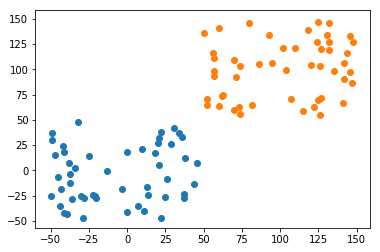

In [31]:
data = generator_data()

In [55]:
class DualPerceptron(object):
    def load_data(self, data):
        # 保存数据
        self.data = data
        
    def init_args(self):
        """
        初始化参数 注意 Gram 矩阵
        拿书上例题 2.2 举例
        
        Gram 矩阵的计算方法是
        x1.T * x1 + x2.T * x2
        比如
        [[1], [2], [3]] * [[1, 2, 3]]
        Gram 矩阵的作用在 judge 函数中
        """
        data = self.data
        self.x1 = data['x1']
        self.x2 = data['x2']
        self.y = data['y']
        self.alpha = np.zeros((1, self.x2.shape[1]))
        self.b = 0
        self.lr = 1
        self.Gram = self.x1.T * self.x1 + self.x2.T * self.x2
        
        
    def update(self, idx):
        """
        更新参数
        书上算法 2.2 (3)
        
        更新 bias 
        公式(2.15)
        """
        self.alpha[0, idx] += self.lr
        self.b += self.y[0, idx]

    def judge(self, idx):
        """
        判断是不是误分类点
        书上算法 2.2 (3)
        
        重点在 Gram 矩阵的如何使用
        
        例题 2.2 (3) 误分类条件
        把求和公式写完全，就可以看到 Gram 矩阵的作用
        """
        y = self.y[0, idx]
        alpha_y = self.alpha * self.y
        
        _l = self.Gram.shape[0]
        _sum = np.sum(self.Gram[:, idx].reshape(1, _l) * alpha_y) + self.b
        if y * _sum <= 0:
            return True
        return False
    
    def cal_weight(self):
        """
        计算权值
        书上公式 2.14 
        """
        w = [0.0] * 2
        w[0] = np.sum(self.alpha * self.y * self.x1)
        w[1] = np.sum(self.alpha * self.y * self.x2)
        
        return w
        
    def train(self):
        """
        训练 算法 2.2
        """
        tran_len = self.x1.shape[1]
        wrong_sample = True
        wrong_sample_num = 0
        while wrong_sample:
            wrong_sample_num = 0
            # 遍历所有样本点
            for i in range(tran_len):
                # 判断误分类点
                if self.judge(i):
                    # 更新参数
                    self.update(i)
                    wrong_sample_num += 1
            if not wrong_sample_num:
                wrong_sample = False
        # 计算权值
        w = self.cal_weight()
        print('train done!')
        return w, self.b

In [56]:
dp = DualPerceptron()
dp.load_data(data)
dp.init_args()
w, b = dp.train()

train done!


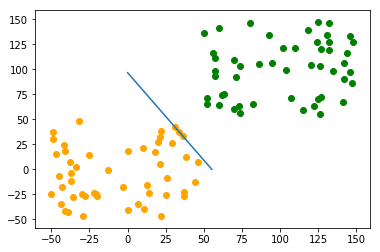

In [57]:
def draw_line(w1, w2, b):
    y1 = b / -w1
    x2 = b / -w2
    plt.plot([0, y1], [x2, 0])

draw_line(w[0], w[1], b)
plt.scatter(data['x1'][0, 0:50], data['x2'][0, 0:50], color="orange")
plt.scatter(data['x1'][0, 50:], data['x2'][0, 50:], color="green")
plt.show()